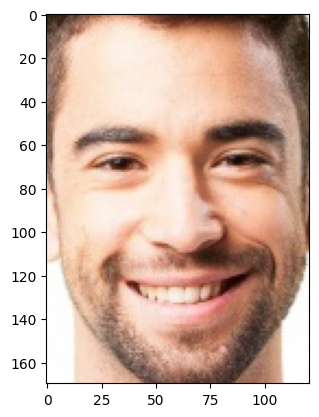

In [69]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv
import matplotlib.pyplot as plt
                    


# Define the path to the image file
image_path = r"D:\genderdataset\man\face_0.jpg"

img_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if img_bgr is None:
    print("Error: Image could not be loaded.")
else:
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Display the RGB image
    plt.imshow(img_rgb)
    plt.axis('on')  # Turn off axis numbers and ticks
    plt.show()



In [70]:
img_rgb.shape

(170, 121, 3)

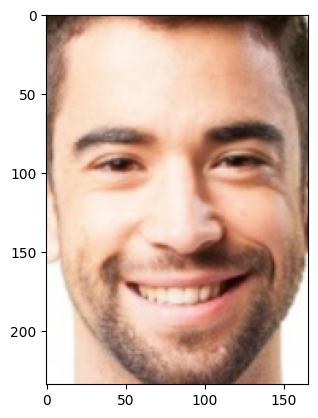

In [74]:
new_height = 234
scale = new_height / img_rgb.shape[0]
new_width = int(img_rgb.shape[1] * scale)
resized_img = cv2.resize(img_rgb, (new_width, new_height))

# Display the resized image
plt.imshow(resized_img)
plt.axis('on')
plt.show()

In [75]:
resized_img.shape

(234, 166, 3)

In [79]:
def resize_images_in_folder(folder_path, target_height=234, target_width=234):
    images = []
    labels = []
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                
                # Read the image
                img_bgr = cv2.imread(img_path)
                if img_bgr is None:
                    continue
                
                img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
                
                # Get the current dimensions of the image
                height, width = img_rgb.shape[:2]
                
                # Calculate the scale to resize the image while maintaining aspect ratio
                scale = target_height / height
                new_width = int(width * scale)
                
                # Resize the image
                resized_img = cv2.resize(img_rgb, (new_width, target_height))
                
                # Pad or crop the image to ensure it has the target width
                if new_width < target_width:
                    # Padding
                    pad_width = target_width - new_width
                    left_pad = pad_width // 2
                    right_pad = pad_width - left_pad
                    padded_img = cv2.copyMakeBorder(resized_img, 0, 0, left_pad, right_pad, cv2.BORDER_CONSTANT, value=(0, 0, 0))
                elif new_width > target_width:
                    # Cropping
                    start_x = (new_width - target_width) // 2
                    cropped_img = resized_img[:, start_x:start_x + target_width]
                    padded_img = cropped_img
                else:
                    padded_img = resized_img
                
                # Convert to numpy array and append to list
                images.append(padded_img)
                
                # Determine label based on the folder name
                label = os.path.basename(os.path.dirname(img_path))
                labels.append(1 if label == "woman" else 0)
    
    # Convert lists to numpy arrays
    images = np.array(images, dtype="float") / 255.0
    labels = np.array(labels)
    
    return images, labels

# Define the path to the gender dataset folder
folder_path = r"D:\genderdataset"

# Resize images and get the numpy arrays
images, labels = resize_images_in_folder(folder_path)

print(f"Resized images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Resized images shape: (2307, 234, 234, 3)
Labels shape: (2307,)


In [77]:
import os
import shutil
from pathlib import Path
from send2trash import send2trash
import scipy

#imports for CNN
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.preprocessing import image
from keras import optimizers

In [78]:
print(tf.test.is_gpu_available)

<function is_gpu_available at 0x000001E1C771FBA0>


In [15]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# data preprocessing
We have to seperate the images into training and testing sets in different folders to faciliate the ImageDataGenerator to work

In [80]:
from pathlib import Path
import os

# Setting up the directories
src_dir = Path(Path.cwd()).joinpath('data')
root_dir = Path(Path.cwd())

root_men_dir = os.path.join("D:\\genderdataset\\man")
root_women_dir = os.path.join("D:\\genderdataset\\woman")


In [81]:
import os
from pathlib import Path

# Recreates a fresh directory
src_dir = Path(Path.cwd()).joinpath('data')

if os.path.exists(src_dir):
    send2trash(str(src_dir))

os.mkdir(src_dir)

os.mkdir(src_dir.joinpath('train'))
os.mkdir(src_dir.joinpath('test'))
os.mkdir(src_dir.joinpath('validate'))

os.mkdir(src_dir.joinpath('train', 'men'))
os.mkdir(src_dir.joinpath('train', 'women'))

os.mkdir(src_dir.joinpath('test', 'men'))
os.mkdir(src_dir.joinpath('test', 'women'))

os.mkdir(src_dir.joinpath('validate', 'men'))
os.mkdir(src_dir.joinpath('validate', 'women'))


In [82]:
import os
import numpy as np

# Ratio for splitting
split_ratio = 0.2
train_ratio = 1 - split_ratio
val_test_ratio = split_ratio / 2  # Since validation and test are equal

# For men
all_files = os.listdir(root_men_dir)
np.random.shuffle(all_files)

train_FileNames, temp_FileNames = np.split(np.array(all_files), [int(len(all_files) * train_ratio)])
validation_FileNames, test_FileNames = np.split(temp_FileNames, [int(len(temp_FileNames) * 0.5)])

print("*" * 40)
print("Men Data")
print("all_files number is \t\t" + str(len(all_files)))
print("train_FileNames number is \t" + str(len(train_FileNames)))
print("test_FileNames number is \t" + str(len(test_FileNames)))
print("validation_FileNames number is \t" + str(len(validation_FileNames)))
print("*" * 40, '\n')

# For women
all_files = os.listdir(root_women_dir)
np.random.shuffle(all_files)

w_train_FileNames, w_temp_FileNames = np.split(np.array(all_files), [int(len(all_files) * train_ratio)])
w_validation_FileNames, w_test_FileNames = np.split(w_temp_FileNames, [int(len(w_temp_FileNames) * 0.5)])

print("*" * 40)
print("Women Data")
print("all_files number is \t\t" + str(len(all_files)))
print("train_FileNames number is \t" + str(len(w_train_FileNames)))
print("test_FileNames number is \t" + str(len(w_test_FileNames)))
print("validation_FileNames number is \t" + str(len(w_validation_FileNames)))
print("*" * 40)


****************************************
Men Data
all_files number is 		1173
train_FileNames number is 	938
test_FileNames number is 	118
validation_FileNames number is 	117
**************************************** 

****************************************
Women Data
all_files number is 		1134
train_FileNames number is 	907
test_FileNames number is 	114
validation_FileNames number is 	113
****************************************


In [83]:
#Copying files over to folders
for i, name in enumerate(train_FileNames):
    shutil.copy(str(root_men_dir)+'/'+name, str(src_dir.joinpath('train','men','man')) + str(i) +'.jpg')

for i, name in enumerate(validation_FileNames):
    shutil.copy(str(root_men_dir)+'/'+name, str(src_dir.joinpath('validate','men','man')) + str(i) +'.jpg')

for i, name in enumerate(test_FileNames):
    shutil.copy(str(root_men_dir)+'/'+name, str(src_dir.joinpath('test','men','man')) + str(i) +'.jpg')

for i, name in enumerate(w_train_FileNames):
    shutil.copy(str(root_women_dir)+'/'+name, str(src_dir.joinpath('train','women','woman')) + str(i) +'.jpg')

for i, name in enumerate(w_validation_FileNames):
    shutil.copy(str(root_women_dir)+'/'+name, str(src_dir.joinpath('validate','women','woman')) + str(i) +'.jpg')

for i, name in enumerate(w_test_FileNames):
    shutil.copy(str(root_women_dir)+'/'+name, str(src_dir.joinpath('test','women','woman')) + str(i) +'.jpg')

In [84]:
#Checking if the number of pictures are correct / consistent
print('number of pictures in the training man is \t' , len(os.listdir(src_dir.joinpath('train','men'))))
print('number of pictures in the validate man is \t' , len(os.listdir(src_dir.joinpath('validate','men'))))
print('number of pictures in the test man is \t\t' , len(os.listdir(src_dir.joinpath('test','men'))))
print('number of pictures in the training women is \t' , len(os.listdir(src_dir.joinpath('train','women'))))
print('number of pictures in the validate women is \t' , len(os.listdir(src_dir.joinpath('validate','women'))))
print('number of pictures in the test women is \t' , len(os.listdir(src_dir.joinpath('test','women'))))

number of pictures in the training man is 	 938
number of pictures in the validate man is 	 117
number of pictures in the test man is 		 118
number of pictures in the training women is 	 907
number of pictures in the validate women is 	 113
number of pictures in the test women is 	 114


In [85]:
import tensorflow as tf
from pathlib import Path

train_dir = str(src_dir.joinpath('train'))
validation_dir = str(src_dir.joinpath('validate'))
test_dir = str(src_dir.joinpath('test'))
batch_size = 20
img_size = (150, 150)


In [87]:
import tensorflow as tf

def augment_image(image):
    # Resize the image
    image = tf.image.resize(image, img_size)

    # Random horizontal flip
    image = tf.image.random_flip_left_right(image)

    # Random brightness adjustment
    image = tf.image.random_brightness(image, 0.2)

    # Random rotation (simulated with rotation and padding)
    radians = tf.random.uniform([], -0.2, 0.2)
    image = tfa.image.rotate(image, radians)

    # Random contrast adjustment
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # Random zoom (simulated by resizing with a zoom factor)
    zoom_factor = tf.random.uniform([], 0.9, 1.1)
    image = tf.image.resize(image, [int(img_size[0] * zoom_factor), int(img_size[1] * zoom_factor)])
    image = tf.image.resize_with_crop_or_pad(image, img_size[0], img_size[1])

    # Adding Gaussian noise
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.1)
    image = tf.add(image, noise)

    # Random saturation adjustment


In [88]:
from tensorflow.keras.preprocessing import image


In [90]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validate_datagen = image.ImageDataGenerator(
    rescale=1./255)

test_datagen = image.ImageDataGenerator(
    rescale=1./255)


# modelling time 
Here we put the images into an image data generator so that when we call fit generator later on, the images will flow from our directory into the model.

We use some data augmentation to make the model more robust

In [91]:
from tensorflow.keras.preprocessing import image

train_dir = src_dir.joinpath('train')
validation_dir = src_dir.joinpath('validate')
test_dir = src_dir.joinpath('test')

train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validate_datagen = image.ImageDataGenerator(
    rescale=1./255)

test_datagen = image.ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary')

validation_generator = validate_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False)


Found 1845 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Found 232 images belonging to 2 classes.


In [95]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dropout, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2

# Define the input layer
input = Input(shape=(100, 100, 1))  # Adjust input shape if necessary

# Convolutional Layer 1
conv1 = Conv2D(32, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Convolutional Layer 2
conv2 = Conv2D(64, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

# Convolutional Layer 3
conv3 = Conv2D(128, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

# Convolutional Layer 4
conv4 = Conv2D(256, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

# Flatten the output from the convolutional layers
flatten = Flatten()(pool4)

# Fully Connected Layer
dense_1 = Dense(128, activation='relu')(flatten)
drop_1 = Dropout(0.2)(dense_1)

# Output Layer for Binary Classification
output = Dense(1, activation='sigmoid')(drop_1)

# Create the Model
model = Model(inputs=input, outputs=output)

# Compile the Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# Display the Model Summary
model.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 100, 100, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,567,745 (5.98 MB)

 Trainable params: 1,567,745 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4)
)


In [104]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model
input_layer = Input(shape=(150, 150, 3))  # Adjust the input shape to match your data
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4)
)

# Define the file path and create the ModelCheckpoint callback
model_path = 'C:/Users/HP/gender detection/gender_model.keras'  # Change to .keras
checkpointer = ModelCheckpoint(
    filepath=model_path, 
    monitor='val_loss',  # or 'loss' depending on which metric you want to monitor
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto', 
    save_freq='epoch'
)
callback_list = [checkpointer]

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\HP\gender detection\data\train",
    target_size=(150, 150),  # Resize images to match model input
    batch_size=32,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    r"C:\Users\HP\gender detection\data\validate",
    target_size=(150, 150),  # Resize images to match model input
    batch_size=32,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100, 
    epochs=50, 
    validation_data=validation_generator, 
    validation_steps=10, 
    shuffle=True,
    callbacks=callback_list  # Pass the callbacks here
)


Found 1845 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Epoch 1/50


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 58/100 ━━━━━━━━━━━━━━━━━━━━ 37s 889ms/step - accuracy: 0.5240 - loss: 0.6951

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 1: val_loss improved from inf to 0.68183, saving model to C:/Users/HP/gender detection/gender_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 557ms/step - accuracy: 0.5325 - loss: 0.6935 - val_accuracy: 0.5043 - val_loss: 0.6818
Epoch 2/50
 58/100 ━━━━━━━━━━━━━━━━━━━━ 27s 649ms/step - accuracy: 0.6057 - loss: 0.6729
Epoch 2: val_loss improved from 0.68183 to 0.62843, saving model to C:/Users/HP/gender detection/gender_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 390ms/step - accuracy: 0.6147 - loss: 0.6686 - val_accuracy: 0.6652 - val_loss: 0.6284
Epoch 3/50
 58/100 ━━━━━━━━━━━━━━━━━━━━ 27s 651ms/step - accuracy: 0.6749 - loss: 0.6185
Epoch 3: val_loss improved from 0.62843 to 0.53311, saving model to C:/Users/HP/gender detection/gender_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 390ms/step - accuracy: 0.6792 - loss: 0.6116 - val_accuracy: 0.7652 - val_loss: 0.5331
Epoch 4/50
 58/100 ━━━━━━━━━━━━━━━━━━━━ 27s 649ms/step - accuracy: 0.7432 - loss: 0.5352
Epoch 4: val_loss improved f

In [105]:
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10,10))
    plt.plot(epochs, acc, 'b--', label="Training accuracy")
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.figure(figsize=(10,10))
    plt.plot(epochs, loss, 'b--', label="Training loss")
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


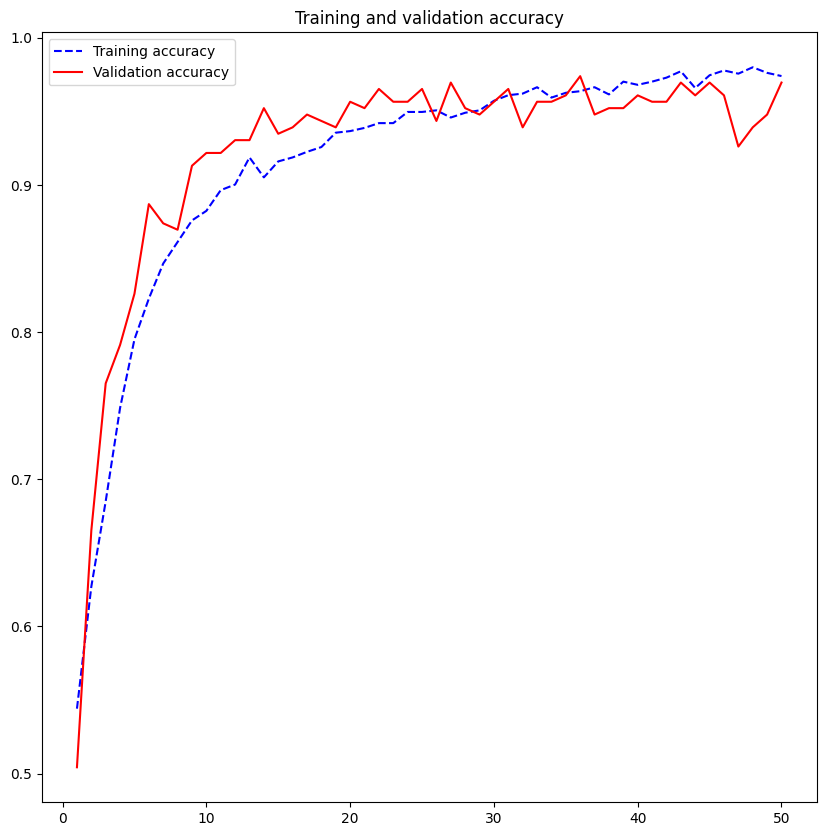

<Figure size 640x480 with 0 Axes>

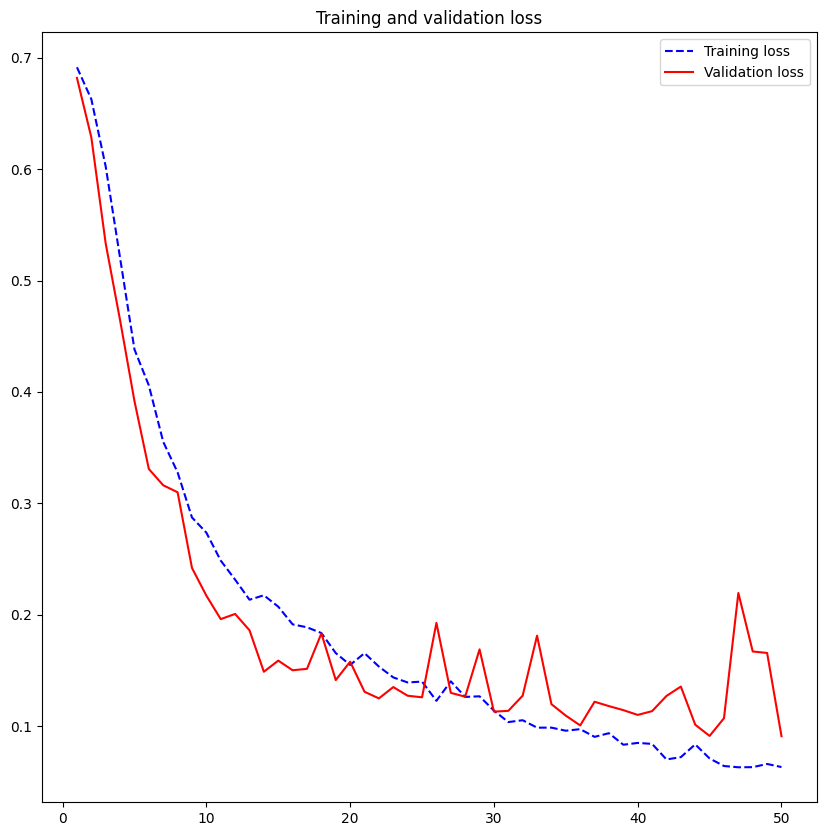

In [106]:
plot_results(history)

In [107]:
# Extracting the train and test loss and accuracy
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Printing the results
print("Train Loss: ", train_loss)
print("Validation Loss: ", test_loss)
print("Train Accuracy: ", train_accuracy)
print("Validation Accuracy: ", test_accuracy)

Train Loss:  [0.6913569569587708, 0.6627232432365417, 0.6022281646728516, 0.520214319229126, 0.43814703822135925, 0.40584051609039307, 0.3552294075489044, 0.32780036330223083, 0.2873225212097168, 0.273724764585495, 0.24862457811832428, 0.23154772818088531, 0.2135215848684311, 0.21749038994312286, 0.20729859173297882, 0.19141559302806854, 0.1887507438659668, 0.18361644446849823, 0.16562685370445251, 0.15499301254749298, 0.16556097567081451, 0.15352581441402435, 0.14380067586898804, 0.13926388323307037, 0.1400446593761444, 0.1227843388915062, 0.14029082655906677, 0.12630212306976318, 0.12682941555976868, 0.11402180790901184, 0.10371215641498566, 0.10536909103393555, 0.09869231283664703, 0.09872137010097504, 0.09595430642366409, 0.09734456241130829, 0.0904444009065628, 0.09373311698436737, 0.08337017148733139, 0.08500301837921143, 0.08413510024547577, 0.07016806304454803, 0.07224176824092865, 0.08367558568716049, 0.07103782892227173, 0.06427410244941711, 0.06314118206501007, 0.06325457245

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

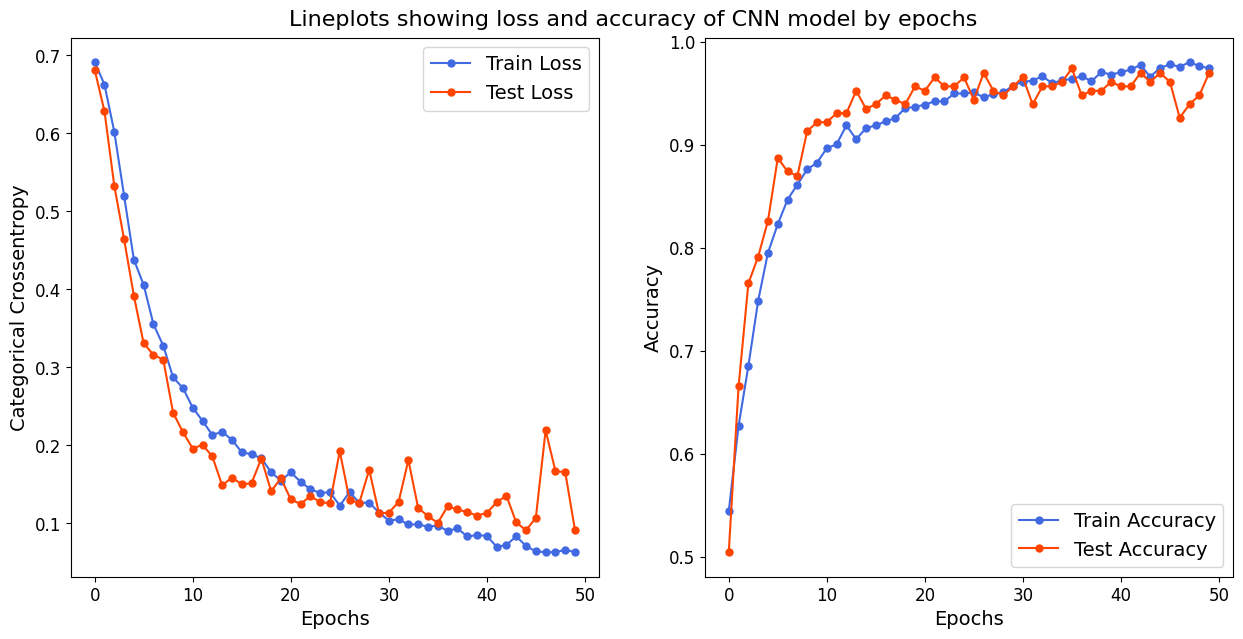

In [108]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [111]:
from keras.models import load_model

# Load the Keras model saved in the .keras format
model = load_model('C:/Users/HP/gender detection/gender_model.keras')

# Save the model in HDF5 (.h5) format
model.save('C:/Users/HP/gender detection/gender_model_best.h5')


In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the pre-trained gender detection model from the specified path
model = load_model(r'C:\Users\HP\gender detection\gender_model_best.h5')

# Define the labels
labels = ['Male', 'Female']
neutral_label = 'Neutral'
confidence_threshold = 0.6  # Define threshold for confidence (adjust based on testing)

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Load pre-trained face detector (Haar cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to preprocess the face for the model
def preprocess_face(face, img_size=(150, 150)):
    face = cv2.resize(face, img_size)  # Resize to the required input size
    face = face.astype('float32') / 255.0  # Normalize the pixel values
    face = np.expand_dims(face, axis=0)  # Add batch dimension
    return face

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = cap.read()
    
    # Convert the frame to grayscale (for face detection)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    male_count = 0
    female_count = 0
    
    # Loop through all the detected faces
    for (x, y, w, h) in faces:
        # Draw a rectangle around each face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Extract the region of interest (the face)
        face = frame[y:y+h, x:x+w]
        
        # Preprocess the face for the gender model
        face_preprocessed = preprocess_face(face)
        
        # Predict the gender
        prediction = model.predict(face_preprocessed)
        predicted_gender_prob = prediction[0][0]
        
        # Determine the label based on confidence
        if predicted_gender_prob > (1 - confidence_threshold):  # Closer to 1 = Female
            gender = 'Female'
            female_count += 1
        elif predicted_gender_prob < confidence_threshold:  # Closer to 0 = Male
            gender = 'Male'
            male_count += 1
        else:
            gender = neutral_label  # Unclear prediction, default to Neutral
        
        # Display the gender label above the rectangle
        cv2.putText(frame, gender, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    # Calculate total faces detected
    total_faces = male_count + female_count
    
    # Calculate the ratio for males and females if total faces is greater than 0
    if total_faces > 0:
        male_ratio = male_count / total_faces
        female_ratio = female_count / total_faces
    else:
        male_ratio = female_ratio = 0  # No faces detected
    
    # Display the count and ratio of males and females on the screen
    cv2.putText(frame, f'Males: {male_count} ({male_ratio:.2f})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(frame, f'Females: {female_count} ({female_ratio:.2f})', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    # Display the output frame
    cv2.imshow('Gender Detection', frame)
    
    # Break the loop if the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━